In [1]:
# extension of Individual Project.ipynb
import pandas as pd
import numpy as np

location = "datasets/nyc-property-sales/nyc-rolling-sales.csv"
df = pd.read_csv(location)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [2]:
# check data types
df.dtypes

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [3]:
# want to use sale price, so check for not-null entries
#nonNull = df[df['SALE PRICE'] != np.nan]
#nonNull.shape

In [4]:
nonNull = df
nonNull['SALE PRICE'] = pd.to_numeric(nonNull['SALE PRICE'],errors='coerce')
# get rid of null entries of sale price
nonNull.dropna(axis = 0, how='any', inplace=True)

In [5]:
df.shape

(69987, 22)

In [6]:
nonNull['GROSS SQUARE FEET'] = pd.to_numeric(nonNull['GROSS SQUARE FEET'],errors='coerce')
# get rid of null entries of gross square feet
nonNull.dropna(axis = 0, how = 'any', inplace = True)

In [7]:
nonNull['RESIDENTIAL UNITS'] = pd.to_numeric(nonNull['RESIDENTIAL UNITS'],errors='coerce')
# get rid of null entries of residential square feet
nonNull.dropna(axis = 0, how = 'any', inplace = True)

In [8]:
nonNull['TAX CLASS AT TIME OF SALE'] = pd.to_numeric(nonNull['TAX CLASS AT TIME OF SALE'],errors='coerce')
# get rid of null entries of  tax class at time of sale
nonNull.dropna(axis = 0, how = 'any', inplace = True)

In [9]:
import seaborn as sns
# correlation heat map of four factors
correlation_df = nonNull.filter(['SALE PRICE', 'GROSS SQUARE FEET', 'RESIDENTIAL UNITS', 'TAX CLASS AT TIME OF SALE', 'TOTAL UNITS', 'YEAR BUILT'], axis = 1)
correlation_df.corr()

,SALE PRICE,GROSS SQUARE FEET,RESIDENTIAL UNITS,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT
SALE PRICE,1.000000,0.455423,0.123095,0.087813,0.128541,0.007554
GROSS SQUARE FEET,0.455423,1.000000,0.618467,0.121108,0.557268,0.031343
RESIDENTIAL UNITS,0.123095,0.618467,1.000000,0.023809,0.848356,0.027061
TAX CLASS AT TIME OF SALE,0.087813,0.121108,0.023809,1.000000,0.051124,-0.223091
TOTAL UNITS,0.128541,0.557268,0.848356,0.051124,1.000000,0.025060
YEAR BUILT,0.007554,0.031343,0.027061,-0.223091,0.025060,1.000000


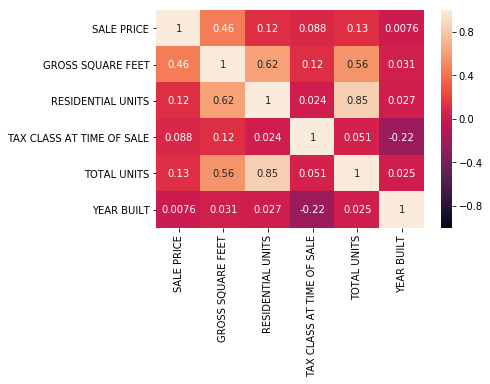

In [10]:
import seaborn as sns
# correlation heat map of four factors
correlation_df = nonNull.filter(['SALE PRICE', 'GROSS SQUARE FEET', 'RESIDENTIAL UNITS', 
                                 'TAX CLASS AT TIME OF SALE', 'TOTAL UNITS', 'YEAR BUILT'], axis = 1)
sns.heatmap(correlation_df.corr(), vmin = -1, annot = True)

In [11]:
correlation_df.columns = ['price', 'gross', 'residential', 'tax', 'total', 'year']

import statsmodels.formula.api as smf
res = smf.ols('price ~ gross + residential + tax + total + year', data=correlation_df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     3192.
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:53:25   Log-Likelihood:            -8.5337e+05
No. Observations:               48248   AIC:                         1.707e+06
Df Residuals:                   48242   BIC:                         1.707e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.927e+05    2.6e+05      0.742      0.458   -3.16e+05    7.01e+05
gross         277.4983      2.314    119.924      0.000     272.963     282.034
residential -2.039e+05   6082.520    -33.522      0.000   -2.16e+05   -1.92e+05
tax          3.135e+05   6.59e+04      4.758      0.000    1.84e+05    4.43e+05
total        8355.0315   4835.955      1.728      0.084   -1123.503    1.78e+04
year          -10.2366    117.082     -0.087      0.930    -239.719     219.246
==============================================================================
Omnibus:                   174728.258   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     277786551499.931
Skew:                          74.661   Prob(JB):                         0.00
Kurtosis:                   11757.023   Cond. No.                     1.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
res = smf.ols('price ~ gross + residential + tax', data=correlation_df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     5318.
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:53:26   Log-Likelihood:            -8.5337e+05
No. Observations:               48248   AIC:                         1.707e+06
Df Residuals:                   48244   BIC:                         1.707e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.659e+05   1.08e+05      1.533      0.125   -4.62e+04    3.78e+05
gross         277.7724      2.305    120.495      0.000     273.254     282.291
residential -1.958e+05   3862.215    -50.692      0.000   -2.03e+05   -1.88e+05
tax          3.202e+05   6.41e+04      4.998      0.000    1.95e+05    4.46e+05
==============================================================================
Omnibus:                   174699.555   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     277545447985.187
Skew:                          74.624   Prob(JB):                         0.00
Kurtosis:                   11751.921   Cond. No.                     6.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
res = smf.ols('price ~ gross + residential + tax -1', data=correlation_df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     5476.
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        10:53:26   Log-Likelihood:            -8.5337e+05
No. Observations:               48248   AIC:                         1.707e+06
Df Residuals:                   48245   BIC:                         1.707e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
gross         277.4296      2.294    120.914      0.000     272.932     281.927
residential -1.952e+05   3842.751    -50.794      0.000   -2.03e+05   -1.88e+05
tax          4.056e+05   3.17e+04     12.801      0.000    3.44e+05    4.68e+05
==============================================================================
Omnibus:                   174727.233   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     277877170955.696
Skew:                          74.660   Prob(JB):                         0.00
Kurtosis:                   11758.940   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
correlation_df.describe()

,price,gross,residential,tax,total,year
count,4.824800e+04,4.824800e+04,48248.000000,48248.000000,48248.000000,48248.000000
mean,1.155576e+06,3.672552e+03,2.569682,1.475812,2.837755,1827.738082
std,1.340423e+07,2.947540e+04,17.468624,0.833568,20.752771,464.418481
min,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000
25%,8.056000e+04,8.280000e+02,1.000000,1.000000,1.000000,1920.000000
50%,4.800000e+05,1.620000e+03,1.000000,1.000000,1.000000,1931.000000
75%,8.300000e+05,2.520000e+03,2.000000,2.000000,2.000000,1961.000000
max,2.210000e+09,3.750565e+06,1844.000000,4.000000,2261.000000,2017.000000


In [15]:
# removing all entries with price outliers - greater or lesser than three standard deviations above mean
third_std_pos = correlation_df['price'].mean() + 3*correlation_df['price'].std()
third_std_neg = correlation_df['price'].mean() - 3*correlation_df['price'].std()

# grabbing the standard deviation threshholds for gross square feet now because dropping entries will change mean/std
gross_std_pos = correlation_df['gross'].mean() + 3*correlation_df['gross'].std()
gross_std_neg = correlation_df['gross'].mean() - 3*correlation_df['gross'].std()

no_outliers_df = correlation_df.drop(correlation_df[(correlation_df['price'] < third_std_neg) | (correlation_df['price'] > third_std_pos)].index)
#correlation_df[correlation_df['price'] > third_std_pos].index
#correlation_df[correlation_df['price'] < third_std_neg].index

In [16]:
no_outliers_df.describe()

,price,gross,residential,tax,total,year
count,4.813700e+04,4.813700e+04,48137.000000,48137.000000,48137.000000,48137.000000
mean,8.363089e+05,3.260402e+03,2.436442,1.471218,2.676403,1827.585994
std,2.074216e+06,2.514009e+04,15.309812,0.827888,18.823114,464.692469
min,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000
25%,8.000000e+04,8.160000e+02,1.000000,1.000000,1.000000,1920.000000
50%,4.800000e+05,1.620000e+03,1.000000,1.000000,1.000000,1931.000000
75%,8.268190e+05,2.510000e+03,2.000000,2.000000,2.000000,1961.000000
max,4.100000e+07,3.750565e+06,1844.000000,4.000000,2261.000000,2017.000000


In [17]:
# removing all entries with gross square feet outliers - greater or lesser than three standard deviations above mean

no_priceOrGross_outliers = no_outliers_df.drop(no_outliers_df[(no_outliers_df['price'] < gross_std_neg) | (no_outliers_df['price'] > gross_std_pos)].index)

In [18]:
no_priceOrGross_outliers.describe()

,price,gross,residential,tax,total,year
count,12163.00000,1.216300e+04,12163.000000,12163.000000,12163.000000,12163.000000
mean,3383.33495,4.542706e+03,2.901833,1.712489,3.187865,1742.099482
std,13819.89776,2.839488e+04,16.676307,1.072583,16.921692,591.897162
min,0.00000,0.000000e+00,0.000000,1.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,1.000000,1.000000,1.000000,1910.000000
50%,0.00000,1.968000e+03,2.000000,1.000000,2.000000,1930.000000
75%,0.00000,3.029000e+03,2.000000,2.000000,3.000000,1960.000000
max,92000.00000,1.330743e+06,889.000000,4.000000,889.000000,2017.000000
